###Setting Environment

In [1]:
#imports 
import pandas as pd
import numpy as np
import pickle
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('always') 
warnings.simplefilter('ignore')
%xmode verbose

Exception reporting mode: Verbose


### Loading Data for Training 
(From EDA)

In [2]:
filename = ['trainX.sav', 'trainY.sav', 'testX.sav', 'testY.sav']
 
X_train = pickle.load(open(filename[0], 'rb'))
y_train = pickle.load(open(filename[1], 'rb'))
X_test = pickle.load(open(filename[2], 'rb'))
y_test = pickle.load(open(filename[3], 'rb'))

### Models

Our Target Variable - Churn is categorical variable. Thus, it is a Classification Problem. Let's try several classifiers to get the best model. Baseline, K-nearest neighbours, Logistic Regression, SVM, Random Forest, Gradient Boosting

In [3]:
seed = 2
acc_results = {}
def train_model(name,model,acc_results):
  m = model.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  acc_results[name] = accuracy

  print('Classifier: {}'.format(name))
  print('\nReport', classification_report(y_test, y_pred))
  print('\nAccuracy: {}'.format(accuracy))
  #print('\nConfusion matrix:\n', confusion_matrix(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test,y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ')
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()

#### Default Parameters

Let's try above classifiers with default parameters. Based on accuracy, let's decide which models to tune further to improve performance.
<br>


##### Baseline (Dummy Classifier)

Classifier: dummy classifier

Report               precision    recall  f1-score   support

       False       0.73      1.00      0.85      1294
        True       0.00      0.00      0.00       467

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.73      0.62      1761


Accuracy: 0.7348097671777399


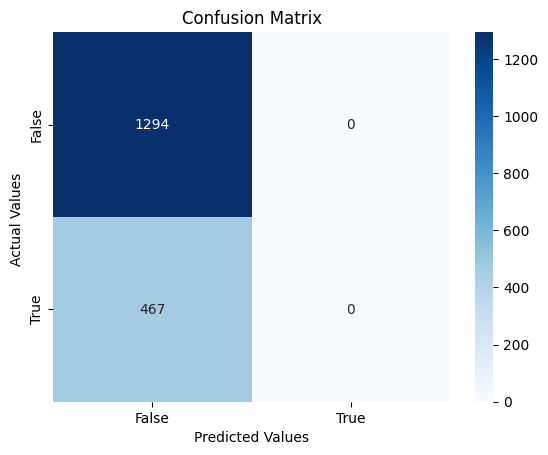

In [4]:
model = DummyClassifier(random_state=seed, strategy='most_frequent')
train_model("dummy classifier", model, acc_results)

##### KNeighborsClassifier

Classifier: KNeighborsClassifier

Report               precision    recall  f1-score   support

       False       0.88      0.65      0.75      1294
        True       0.43      0.75      0.55       467

    accuracy                           0.68      1761
   macro avg       0.66      0.70      0.65      1761
weighted avg       0.76      0.68      0.69      1761


Accuracy: 0.6757524134014764


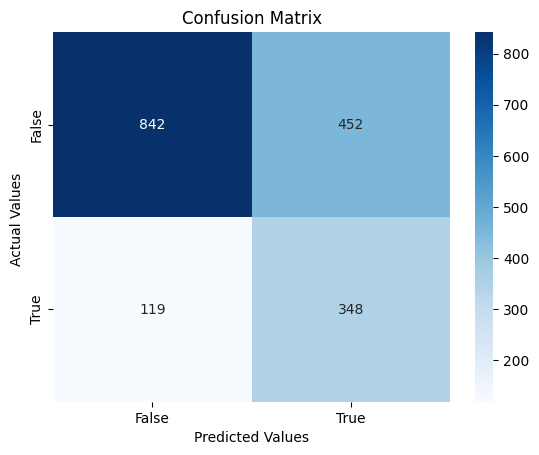

In [5]:
model = KNeighborsClassifier()
#n_neighbors=5
train_model( "KNeighborsClassifier", model, acc_results)

##### Logistic Regression

Classifier: LogisticRegression

Report               precision    recall  f1-score   support

       False       0.91      0.70      0.79      1294
        True       0.50      0.82      0.62       467

    accuracy                           0.73      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.73      0.75      1761


Accuracy: 0.7331061896649631


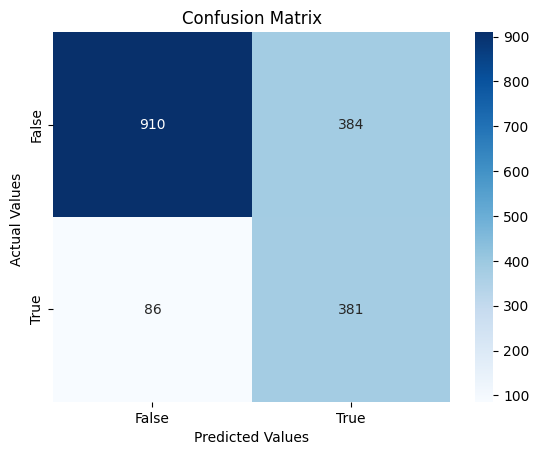

In [6]:
model = LogisticRegression(random_state=seed)
#max_iter=100, solver = lbfgs', penalty=l2
train_model("LogisticRegression", model, acc_results)

##### Support Vector Machines

Classifier: SupportVectorMachines

Report               precision    recall  f1-score   support

       False       0.91      0.70      0.79      1294
        True       0.49      0.80      0.61       467

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.74      1761


Accuracy: 0.7262918796138558


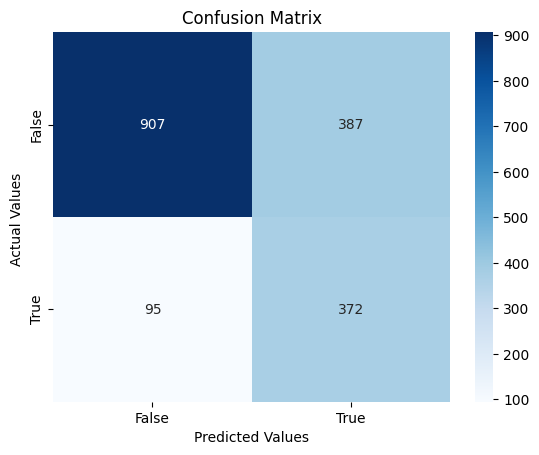

In [7]:
model = SVC(random_state=seed)
train_model("SupportVectorMachines", model,acc_results)

##### Decision Tree Classifier

Classifier: DecisionTreeClassifier

Report               precision    recall  f1-score   support

       False       0.82      0.81      0.82      1294
        True       0.50      0.52      0.51       467

    accuracy                           0.73      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.74      0.73      0.74      1761


Accuracy: 0.7348097671777399


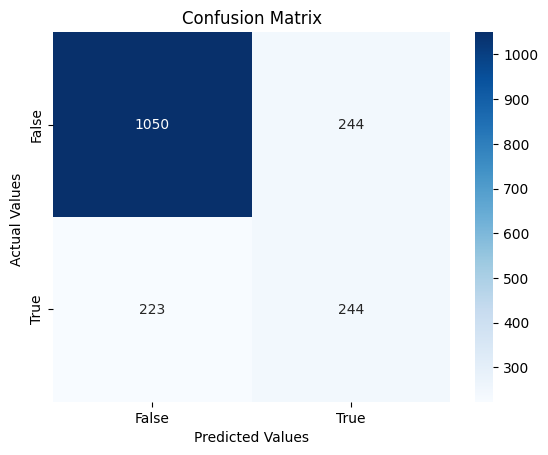

In [8]:
model = DecisionTreeClassifier(random_state=seed)
train_model("DecisionTreeClassifier", model,acc_results)

##### Random Forest Classifier

Classifier: RandomForestClassifier

Report               precision    recall  f1-score   support

       False       0.85      0.86      0.85      1294
        True       0.60      0.58      0.59       467

    accuracy                           0.79      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.79      0.78      1761


Accuracy: 0.7853492333901193


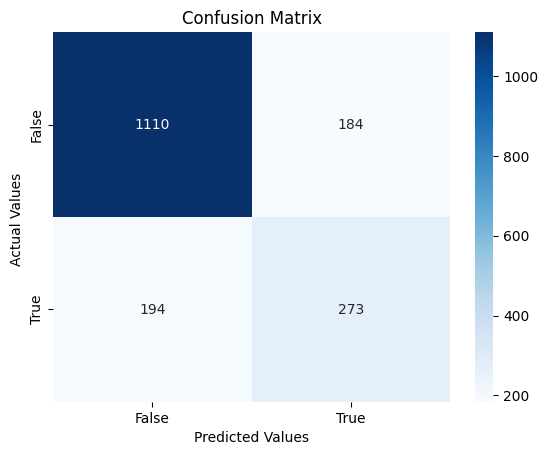

In [9]:
model = RandomForestClassifier(random_state=seed)
train_model("RandomForestClassifier", model,acc_results)

##### Gradient Boosting Classifier

Classifier: GradientBoostingClassifier

Report               precision    recall  f1-score   support

       False       0.91      0.72      0.81      1294
        True       0.51      0.79      0.62       467

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.76      1761


Accuracy: 0.7427597955706985


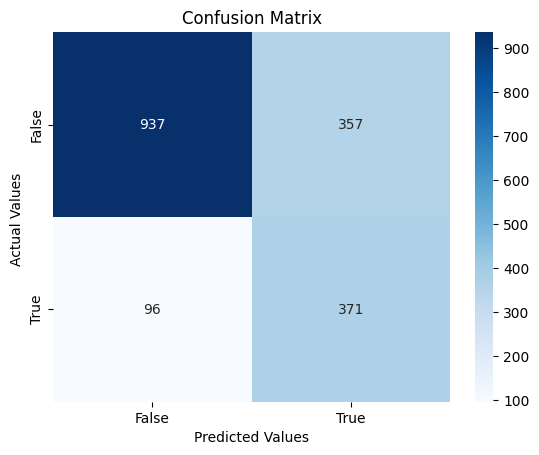

In [10]:
model = GradientBoostingClassifier(random_state=seed)
train_model("GradientBoostingClassifier", model, acc_results)

##### Accuracy Comparison

Random Forest outperforms all other models with default parameters.

In [11]:
sorted(acc_results.items(),  key=lambda x:x[1])

[('KNeighborsClassifier', 0.6757524134014764),
 ('SupportVectorMachines', 0.7262918796138558),
 ('LogisticRegression', 0.7331061896649631),
 ('dummy classifier', 0.7348097671777399),
 ('DecisionTreeClassifier', 0.7348097671777399),
 ('GradientBoostingClassifier', 0.7427597955706985),
 ('RandomForestClassifier', 0.7853492333901193)]

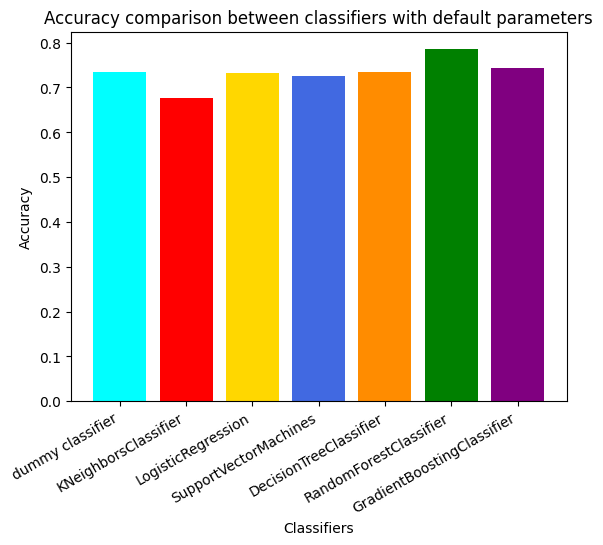

In [12]:
colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'steelblue', 'yellow', 'lime', 'magenta']
plt.bar(list(acc_results.keys()), acc_results.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("Accuracy comparison between classifiers with default parameters")
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
plt.show()

Suprisingly KNN performs worse than Baseline Dummy Classifier. 
The other classifiers have better performance than Baseline. The best performance is obtained by Random Forest Classifier.

#### Hyper Tuned Parameters

Let's tune hyperparameter for each of these models and see how it performs.

#####KNN Classifier

In [16]:
#KNN Classifier
parameters = {'weights':['uniform', 'distance'], 'n_neighbors' :list(range(1,102,20)), 'p':[1,2]  }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train.values.ravel())
print("KNN Classifier") 
print(f"Best Parameters : {clf.best_params_}")
print(f"Best Score : {round(clf.best_score_,2)}")
#clf.cv_results_

KNN Classifier
Best Parameters : {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score : 0.86


Let's check the performance of the best model parameters for different values of k. Best Parameters : {'p': 1, 'weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

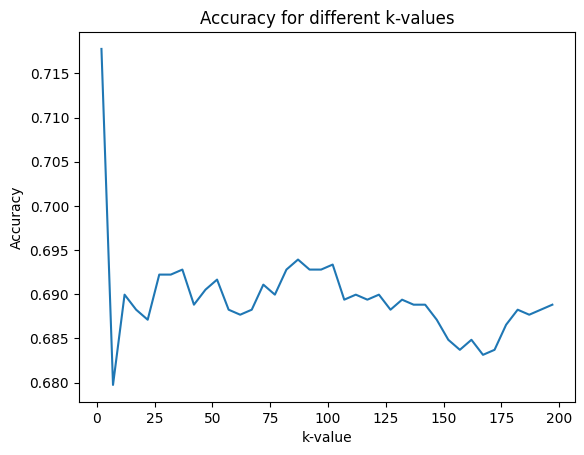

In [17]:
knn_results = {}
for k in range (2, 200, 5):
  knn_model = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  knn_results[k]=accuracy
  
plt.plot(knn_results.keys(), knn_results.values())
plt.title("Accuracy for different k-values")
plt.xlabel("k-value")
plt.ylabel("Accuracy")

From the above visualization, we can observe that we have peak accuracy when k=2. It drops around k=12. So let's experiment with k in range 2-12.

Text(0, 0.5, 'Accuracy')

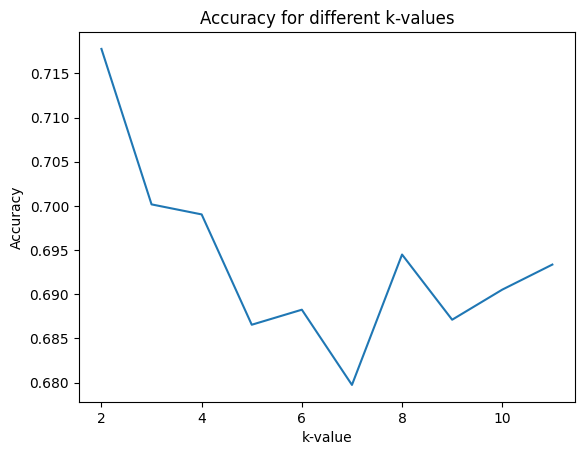

In [19]:
knn_results = {}
for k in range (2, 12, 1):
  knn_model = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  knn_results[k]=accuracy
  
plt.plot(knn_results.keys(), knn_results.values())
plt.title("Accuracy for different k-values")
plt.xlabel("k-value")
plt.ylabel("Accuracy")

The best k value is for k =2. So let's train the model.

Classifier: KNN

Report               precision    recall  f1-score   support

       False       0.81      0.82      0.81      1294
        True       0.48      0.48      0.48       467

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.72      0.73      0.73      1761


Accuracy: 0.7257240204429302


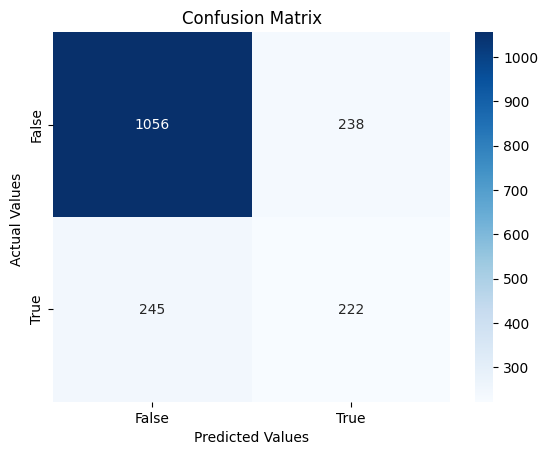

In [20]:
acc_results2 = {}
model = KNeighborsClassifier(n_neighbors=2, p=2, weights='uniform' )
train_model( "KNN", model, acc_results2)

We have significant improvement in performance, from 67% to 72%.
However, it is still performing badly on "true" class targets.

##### Decision Tree
The performance of DT model was worse than Baseline, let's see if there's any improvement after tunning parameters.

In [21]:
## DecisionTreeClassifier
parameters = {'criterion':["gini", "entropy", "log_loss"]  }

dt = DecisionTreeClassifier()
clf3 = GridSearchCV(dt, parameters)
clf3.fit(X_train, y_train.values.ravel())
print("Decision Tree Classifier")
print(f"Best Parameters : {clf3.best_params_}")
print(f"Best Score : {round(clf3.best_score_,2)}")

Decision Tree Classifier
Best Parameters : {'criterion': 'log_loss'}
Best Score : 0.88


Classifier: DecisionTree

Report               precision    recall  f1-score   support

       False       0.82      0.83      0.82      1294
        True       0.50      0.48      0.49       467

    accuracy                           0.74      1761
   macro avg       0.66      0.65      0.66      1761
weighted avg       0.73      0.74      0.73      1761


Accuracy: 0.7359454855195912


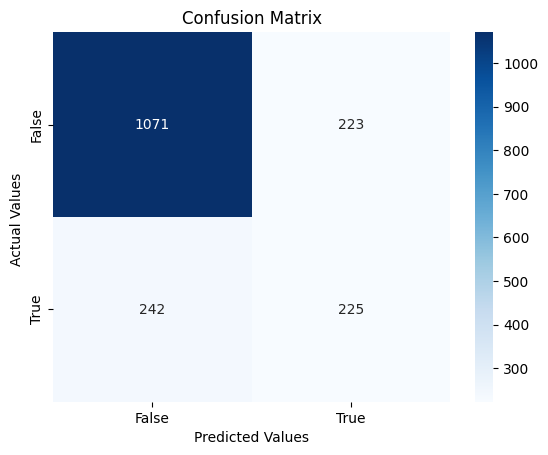

In [23]:
train_model( "DecisionTree", clf3.best_estimator_, acc_results2) 

In [24]:
fimp = pd.Series(clf3.best_estimator_.feature_importances_, index = X_train.columns)
fimp.sort_values(ascending = False , inplace = True)
fimp

TotalCharges                      0.235099
MonthlyCharges                    0.203814
Contract_Two year                 0.128758
tenure                            0.091299
Contract_One year                 0.065381
InternetService_Fiber optic       0.031945
StreamingMovies_Yes               0.027126
PaymentMethod_Electronic check    0.024885
Partner                           0.024307
PaperlessBilling                  0.020784
OnlineSecurity_Yes                0.018868
Dependents                        0.017891
SeniorCitizen                     0.016449
PaymentMethod_Credit card         0.015794
OnlineBackup_Yes                  0.014226
TechSupport_Yes                   0.013489
DeviceProtection_Yes              0.012951
PaymentMethod_Mailed check        0.011426
MultipleLines_Yes                 0.009936
StreamingTV_Yes                   0.009934
InternetService_No                0.005638
dtype: float64

Though we got slightly better performance than default model, but it is not significant improvement.

##### Logistic Regression

In [25]:
## Logistic Regression
parameters = {'penalty':['l1', 'l2','elasticnet'], 'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']  }
lr = LogisticRegression()
clf2 = GridSearchCV(lr, parameters)
clf2.fit(X_train, y_train.values.ravel())
print("Logistic Regression")
acc_results["Logistic Regression"] = clf.best_score_
print(f"Best Parameters : {clf2.best_params_}")
print(f"Best Score : {round(clf2.best_score_,2)}")

Logistic Regression
Best Parameters : {'penalty': 'l1', 'solver': 'liblinear'}
Best Score : 0.77


Classifier: LogisticRegression

Report               precision    recall  f1-score   support

       False       0.91      0.70      0.79      1294
        True       0.49      0.82      0.62       467

    accuracy                           0.73      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.80      0.73      0.74      1761


Accuracy: 0.7296990346394094


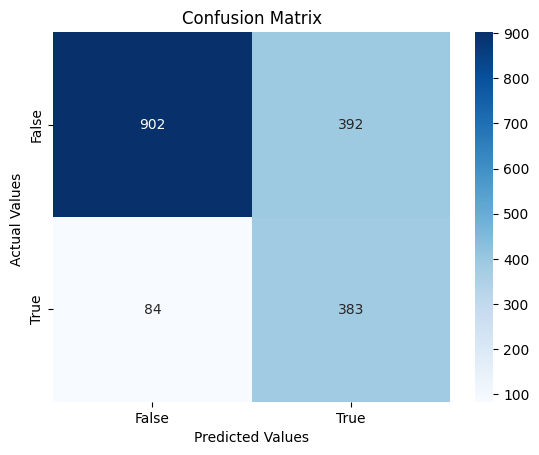

In [26]:
train_model( "LogisticRegression", clf2.best_estimator_, acc_results2) 

##### Support Vector Machines

In [27]:
## SVC
parameters = {'kernel':["linear", "poly", "rbf", "sigmoid"]  }

svc = SVC()
clf5 = GridSearchCV(svc, parameters)
clf5.fit(X_train, y_train.values.ravel())
print("SVM Classifier")
acc_results["SVM Classifier"] = clf.best_score_
print(f"Best Parameters : {clf5.best_params_}")
print(f"Best Score : {round(clf5.best_score_,2)}")

SVM Classifier
Best Parameters : {'kernel': 'rbf'}
Best Score : 0.79


Classifier: SVC

Report               precision    recall  f1-score   support

       False       0.91      0.70      0.79      1294
        True       0.49      0.80      0.61       467

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.74      1761


Accuracy: 0.7262918796138558


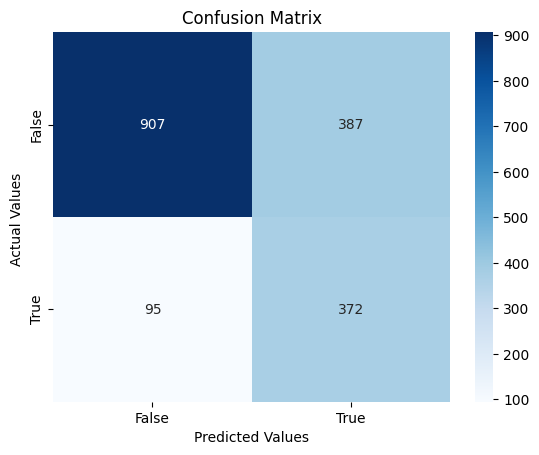

In [28]:
train_model( "SVC", clf5.best_estimator_, acc_results2) 

##### Random Forest Classifier

In [29]:
## RandomForestClassifier
parameters = {'criterion':["gini", "entropy", "log_loss"], 'max_features' : ["sqrt", "log2", None] , 'n_estimators' : list(range(10,250,20))}

rf = RandomForestClassifier()
clf4 = GridSearchCV(rf, parameters)
clf4.fit(X_train, y_train.values.ravel())
print("Random Forest Classifier")
acc_results["Random Forest Classifier"] = clf.best_score_
print(f"Best Parameters : {clf4.best_params_}")
print(f"Best Score : {round(clf4.best_score_,2)}")

Random Forest Classifier
Best Parameters : {'criterion': 'log_loss', 'max_features': 'log2', 'n_estimators': 190}
Best Score : 0.91


We get best accuracy for n-estimator 190. Let's try for shorter range of values and see if performance improves while keeping rest of the best parameters same.

Text(0, 0.5, 'Accuracy')

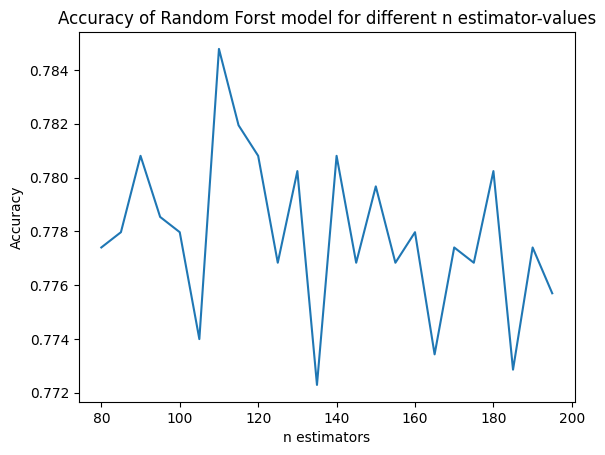

In [32]:
rf_results = {}
for n in range (80, 200, 5):
  rf = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=n)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rf_results[n]=accuracy
  
plt.plot(rf_results.keys(), rf_results.values())
plt.title("Accuracy of Random Forst model for different n estimator-values")
plt.xlabel("n estimators")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

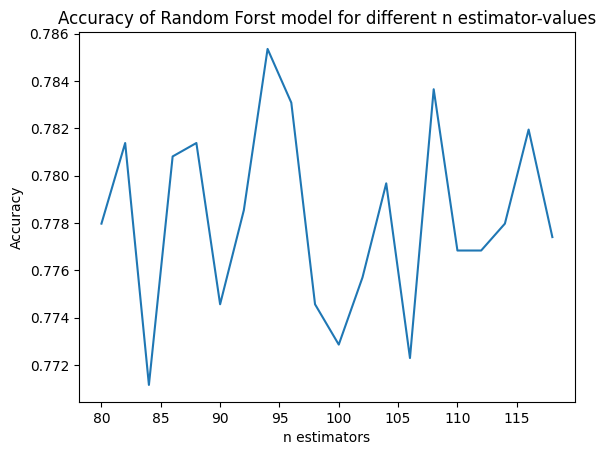

In [54]:
rf_results = {}
for n in range (80, 120, 2):
  rf = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=n)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rf_results[n]=accuracy
  
plt.plot(rf_results.keys(), rf_results.values())
plt.title("Accuracy of Random Forst model for different n estimator-values")
plt.xlabel("n estimators")
plt.ylabel("Accuracy")

Let's try n_estimator=80. Let's try build the model for this case.

Classifier: Random Forest

Report               precision    recall  f1-score   support

       False       0.85      0.85      0.85      1294
        True       0.58      0.60      0.59       467

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761


Accuracy: 0.7808063600227144


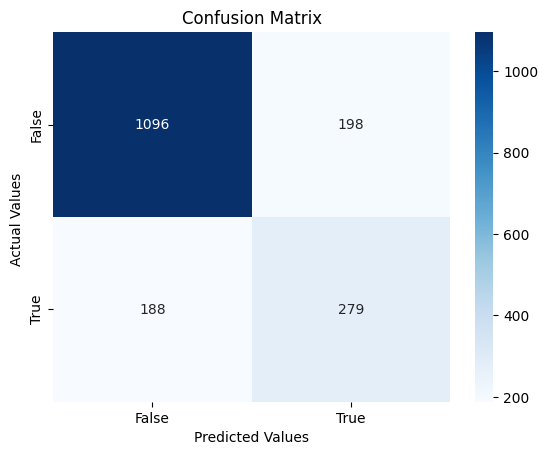

In [61]:
rf = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=80)
train_model( "Random Forest", rf, acc_results2) 

##### Gradient Boosting Classifier

In [35]:
## GradientBoostingClassifier
parameters = {'loss' : ['log_loss', 'exponential'], 'criterion' : ['friedman_mse', 'squared_error'], 'n_estimators' : list(range(10,250,50)), 'learning_rate':[0.01] }

gb = GradientBoostingClassifier()
clf6 = GridSearchCV(gb, parameters)
clf6.fit(X_train, y_train.values.ravel())
print("Gradient Boosting Classifier")
acc_results["Gradient Boosting Classifier"] = clf.best_score_
print(f"Best Parameters : {clf6.best_params_}")
print(f"Best Score : {round(clf6.best_score_,2)}")

Gradient Boosting Classifier
Best Parameters : {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'n_estimators': 210}
Best Score : 0.77


Let's first find a good estimatior and then learning rate.

Text(0, 0.5, 'Accuracy')

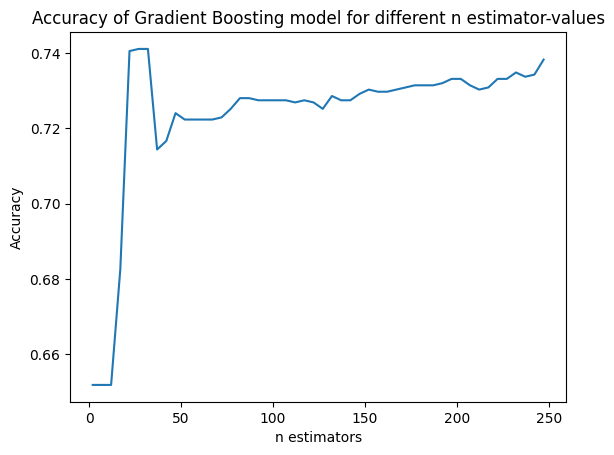

In [36]:
gb = {}
for n in range (2, 250, 5):
  g = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', learning_rate=0.01, n_estimators=n)
  g.fit(X_train, y_train)
  y_pred = g.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  gb[n]=accuracy
  
plt.plot(gb.keys(), gb.values())
plt.title("Accuracy of Gradient Boosting model for different n estimator-values")
plt.xlabel("n estimators")
plt.ylabel("Accuracy")

We get peak for n-estimator between 30-40.

Text(0, 0.5, 'Accuracy')

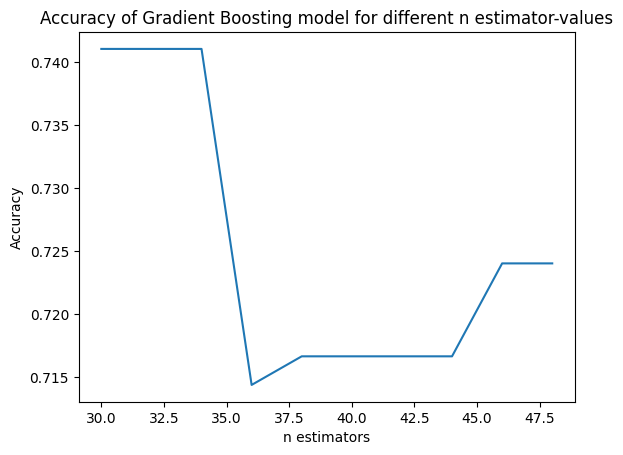

In [37]:
gb = {}
for n in range (30, 50, 2):
  g = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', learning_rate=0.01, n_estimators=n)
  g.fit(X_train, y_train)
  y_pred = g.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  gb[n]=accuracy
  
plt.plot(gb.keys(), gb.values())
plt.title("Accuracy of Gradient Boosting model for different n estimator-values")
plt.xlabel("n estimators")
plt.ylabel("Accuracy")

We have peak for n_estimator = 35. Let's now explore different learning rates.

Text(0, 0.5, 'Accuracy')

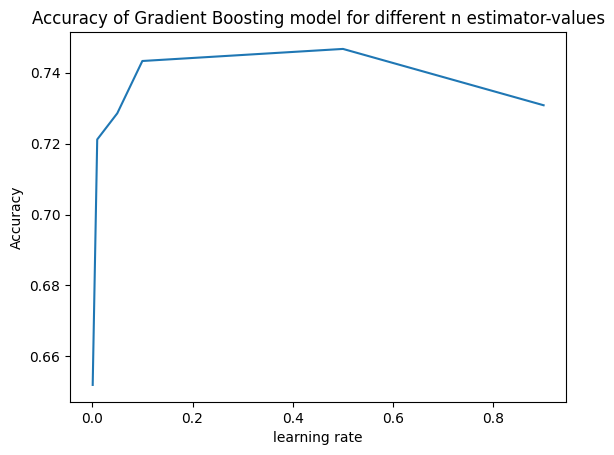

In [39]:
gblr = {}
for n in [0.9, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
  g2 = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', learning_rate=n, n_estimators=35)
  g2.fit(X_train, y_train)
  y_pred = g2.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  gblr[n]=accuracy
  
plt.plot(gblr.keys(), gblr.values())
plt.title("Accuracy of Gradient Boosting model for different n estimator-values")
plt.xlabel("learning rate")
plt.ylabel("Accuracy")

We obtain better performance for lr= 0.5.

Classifier: Gradient Boosting

Report               precision    recall  f1-score   support

       False       0.86      0.80      0.83      1294
        True       0.53      0.63      0.57       467

    accuracy                           0.75      1761
   macro avg       0.69      0.71      0.70      1761
weighted avg       0.77      0.75      0.76      1761


Accuracy: 0.7529812606473595


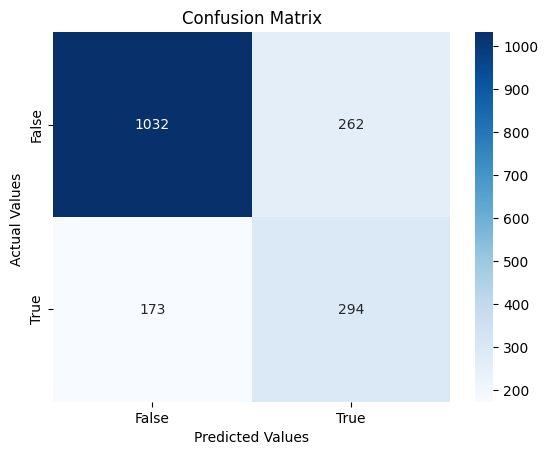

In [40]:
g3 = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', learning_rate=0.5, n_estimators=232)
train_model( "Gradient Boosting", g3, acc_results2) 

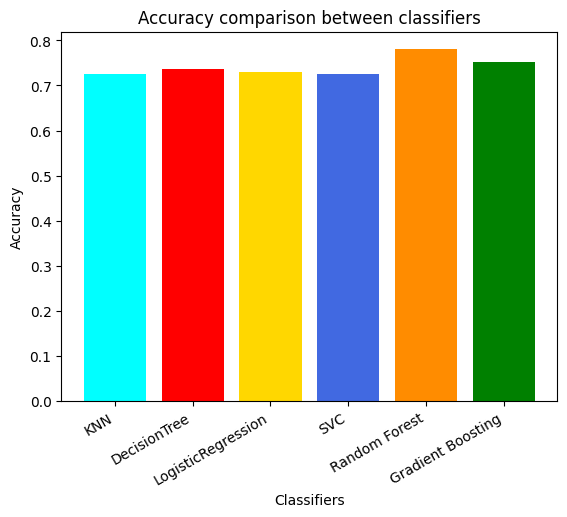

In [56]:
## ACCURACY COMPARISON
plt.bar(list(acc_results2.keys()), acc_results2.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("Accuracy comparison between classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
plt.show()

In [62]:
sorted(acc_results2.items(),key= lambda x : x[1] )

[('KNN', 0.7257240204429302),
 ('SVC', 0.7262918796138558),
 ('LogisticRegression', 0.7296990346394094),
 ('DecisionTree', 0.7359454855195912),
 ('Gradient Boosting', 0.7529812606473595),
 ('Random Forest', 0.7808063600227144)]